# Import Library

In [4]:
# Tambahkan library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Dataset

In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Exploratory Data Analysis
Lengkapi bagian ini sesuai dengan **EDA** yang kalian lakukan

In [6]:
# Lengkapi code

print("Data Train")
df_train.info()

print()

print("Data Test")
df_test.info()

Data Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   40000 non-null  int64  
 1   device_type          36000 non-null  object 
 2   brand                35960 non-null  object 
 3   model                35920 non-null  object 
 4   release_year         35880 non-null  float64
 5   os                   35840 non-null  object 
 6   form_factor          35800 non-null  object 
 7   cpu_brand            35760 non-null  object 
 8   cpu_model            35720 non-null  object 
 9   cpu_tier             35680 non-null  float64
 10  cpu_cores            35640 non-null  float64
 11  cpu_threads          35600 non-null  float64
 12  cpu_base_ghz         35560 non-null  float64
 13  cpu_boost_ghz        35520 non-null  float64
 14  gpu_brand            35480 non-null  object 
 15  gpu_model            3544

In [7]:
print(df_train.isnull().sum())

id                        0
device_type            4000
brand                  4040
model                  4080
release_year           4120
os                     4160
form_factor            4200
cpu_brand              4240
cpu_model              4280
cpu_tier               4320
cpu_cores              4360
cpu_threads            4400
cpu_base_ghz           4440
cpu_boost_ghz          4480
gpu_brand              4520
gpu_model              4560
gpu_tier               4600
vram_gb                4640
ram_gb                 4680
storage_type           4720
storage_gb             4760
storage_drive_count    4800
display_type           4840
display_size_in        4880
resolution             4920
refresh_hz             4960
battery_wh             5000
charger_watts          5040
psu_watts              5080
wifi                   5120
bluetooth              5160
weight_kg              5200
warranty_months        5240
price                     0
dtype: int64


In [8]:
print(df_train.shape)
print()
print(df_test.shape)

(40000, 34)

(60000, 33)


In [9]:
print(df_train.describe())
print()
print(df_test.describe())

                id  release_year      cpu_tier     cpu_cores   cpu_threads  \
count  40000.00000  35880.000000  35680.000000  35640.000000  35600.000000   
mean   19999.50000   2022.323021      3.150533     10.502750     19.327865   
std    11547.14972      2.026884      1.371866      5.040501      9.738358   
min        0.00000   2018.000000      1.000000      4.000000      4.000000   
25%     9999.75000   2021.000000      2.000000      6.000000     12.000000   
50%    19999.50000   2023.000000      3.000000      8.000000     16.000000   
75%    29999.25000   2024.000000      4.000000     14.000000     24.000000   
max    39999.00000   2025.000000      6.000000     28.000000     56.000000   

       cpu_base_ghz  cpu_boost_ghz      gpu_tier       vram_gb        ram_gb  \
count  35560.000000   35520.000000  35400.000000  35360.000000  35320.000000   
mean       2.590799       3.530839      2.985000      6.134615     39.568290   
std        0.336975       0.348954      1.456188      3.9

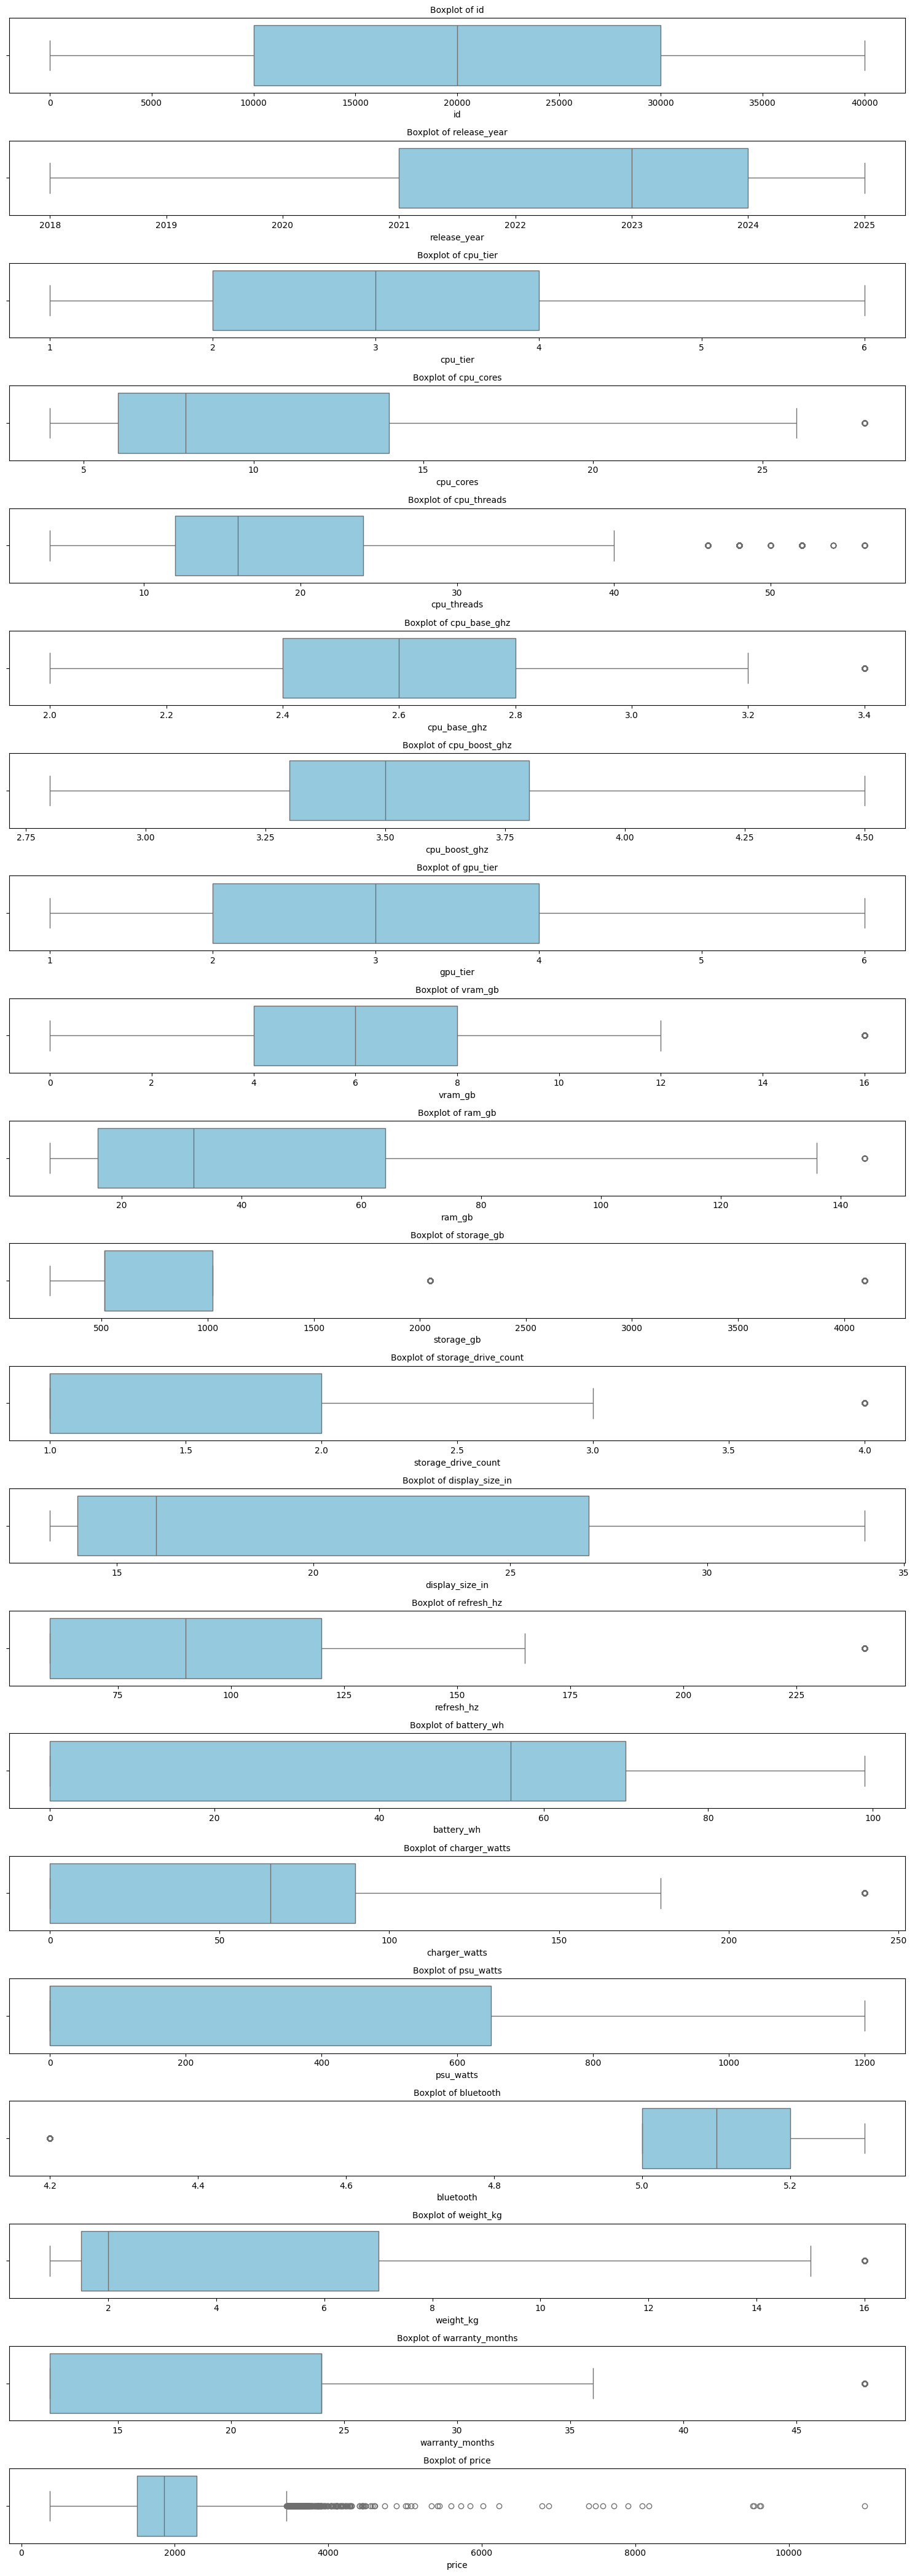

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih hanya kolom numerik
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplot untuk semua fitur numerik
plt.figure(figsize=(15, len(num_cols)*2))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df_train[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=10)

plt.tight_layout()
plt.show()


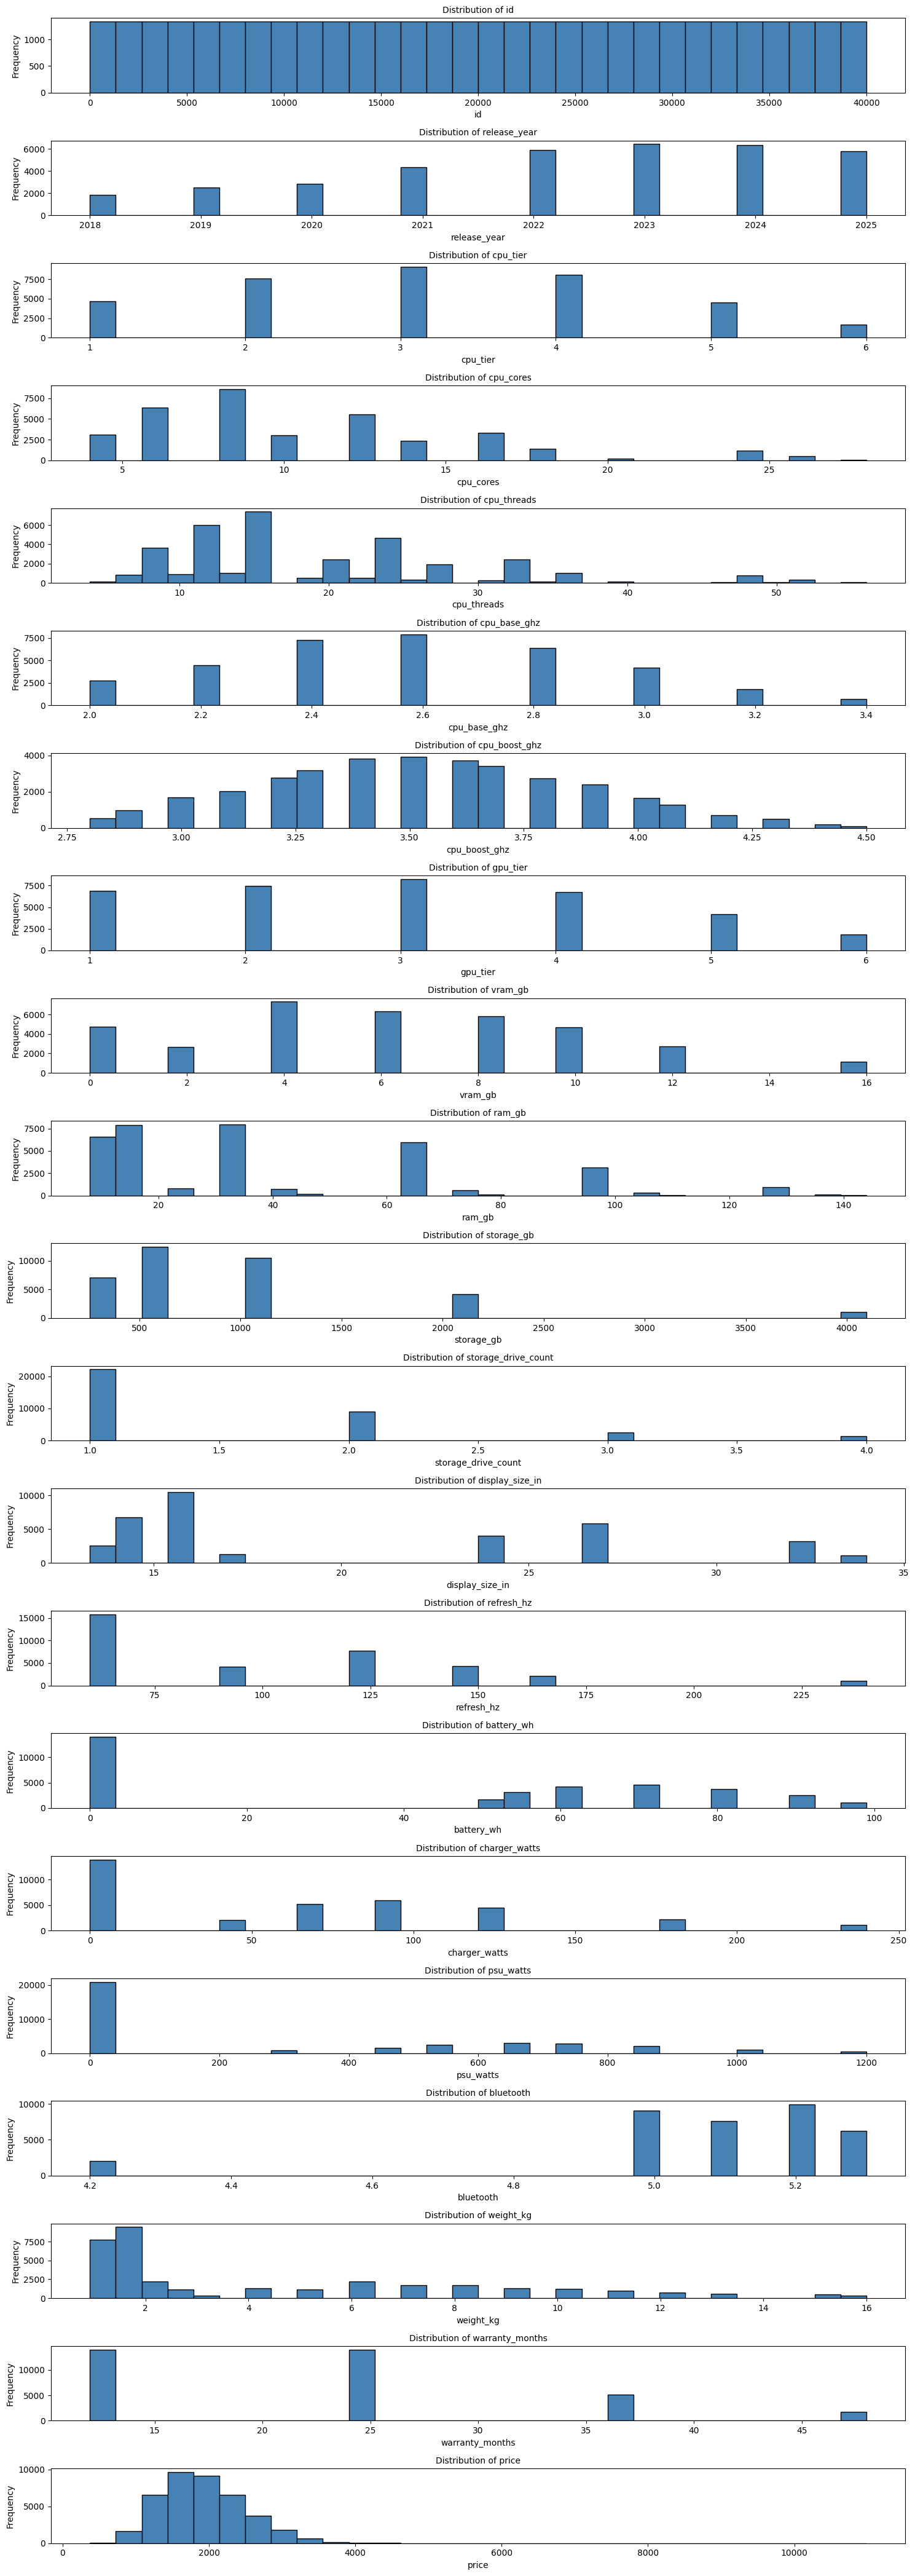

In [29]:
import matplotlib.pyplot as plt

# Pilih kolom numerik
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

# Plot histogram untuk tiap fitur numerik
plt.figure(figsize=(15, len(num_cols)*2))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    plt.hist(df_train[col].dropna(), bins=30, color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


count    40000.000000
mean      1927.909075
std        581.485686
min        372.990000
25%       1505.990000
50%       1863.990000
75%       2285.990000
max      10984.990000
Name: price, dtype: float64


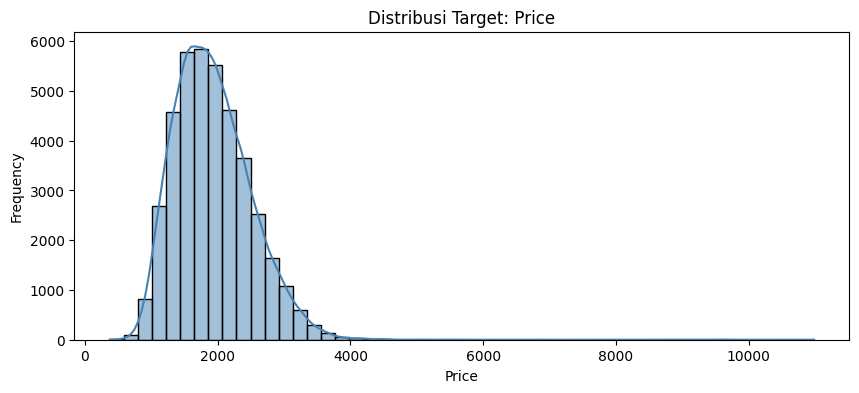

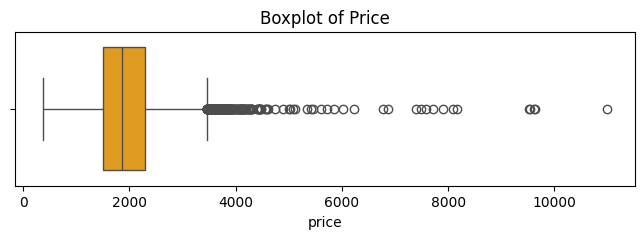

In [30]:
# Cek distribusi fitur target apakah imbalace atau tidak
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik deskriptif
print(df_train['price'].describe())

# Histogram distribusi harga
plt.figure(figsize=(10,4))
sns.histplot(df_train['price'], bins=50, kde=True, color='steelblue')
plt.title("Distribusi Target: Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot harga (cek outlier)
plt.figure(figsize=(8,2))
sns.boxplot(x=df_train['price'], color="orange")
plt.title("Boxplot of Price")
plt.show()


In [31]:
# Cek duplikat
df_train.duplicated().any()


False

In [32]:
# Pilih kolom kategorikal (object/string)
cat_cols = df_train.select_dtypes(include=['object']).columns

# Cek distribusi tiap fitur kategorikal
for col in cat_cols:
    print(f"\n=== {col} ===")
    print(df_train[col].value_counts(dropna=False).head(10))  # tampilkan 10 terbanyak



=== device_type ===
device_type
Laptop     21530
Desktop    14470
NaN         4000
Name: count, dtype: int64

=== brand ===
brand
Lenovo      5762
Dell        5104
HP          5082
Apple       4334
NaN         4040
ASUS        3670
Acer        3474
Samsung     2925
MSI         2809
Gigabyte    1712
Name: count, dtype: int64

=== model ===
model
NaN                4080
Samsung Pro UNA       2
Apple Nitro K84       2
HP Nitro M5L          2
HP Think CFU          2
Lenovo Pro CKJ        2
Lenovo Pro 0EL        2
HP Nitro GWM          2
Dell Strix IVW        2
Apple Think 80R       2
Name: count, dtype: int64

=== os ===
os
Windows     25667
macOS        6536
NaN          4160
Linux        2204
ChromeOS     1433
Name: count, dtype: int64

=== form_factor ===
form_factor
Mainstream     6436
Gaming         6064
ATX            5590
Ultrabook      4728
NaN            4200
Micro-ATX      3071
Full-Tower     2571
2-in-1         2502
SFF            2010
Workstation    1692
Name: count, dtype: in

In [33]:
for col in df_train.columns:
    uniques = df_train[col].unique()
    print(f"\n=== {col} ===")
    print(f"Unique count: {df_train[col].nunique()}")
    print(f"Sample values: {uniques[:10]}")  # tampilkan max 10 contoh



=== id ===
Unique count: 40000
Sample values: [0 1 2 3 4 5 6 7 8 9]

=== device_type ===
Unique count: 2
Sample values: ['Desktop' nan 'Laptop']

=== brand ===
Unique count: 10
Sample values: ['Dell' 'Apple' 'ASUS' 'Samsung' 'HP' nan 'Gigabyte' 'Lenovo' 'MSI' 'Acer']

=== model ===
Unique count: 35800
Sample values: ['Dell Station LEQ' 'Apple Creator RI1' 'ASUS Creator RFG'
 'Dell Station 040' nan 'HP Creator VIK' 'Apple Slim W21'
 'Gigabyte Pro 512' 'Lenovo Think LEO' 'Samsung Blade 7HT']

=== release_year ===
Unique count: 8
Sample values: [2022. 2024. 2021. 2025.   nan 2023. 2018. 2020. 2019.]

=== os ===
Unique count: 4
Sample values: [nan 'macOS' 'Windows' 'Linux' 'ChromeOS']

=== form_factor ===
Unique count: 10
Sample values: ['Mini-ITX' 'Ultrabook' 'SFF' 'Gaming' 'Mainstream' 'ATX' nan 'Full-Tower'
 '2-in-1' 'Micro-ATX']

=== cpu_brand ===
Unique count: 3
Sample values: ['Intel' 'Apple' nan 'AMD']

=== cpu_model ===
Unique count: 18093
Sample values: [nan 'Apple M1' 'Intel i5-

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


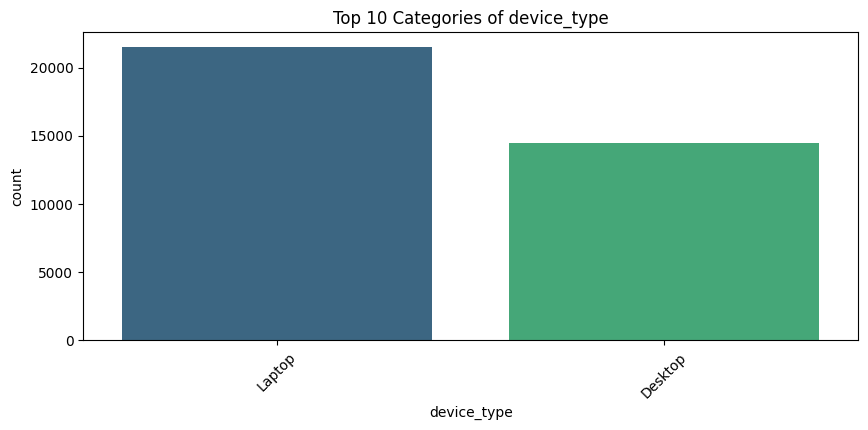

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


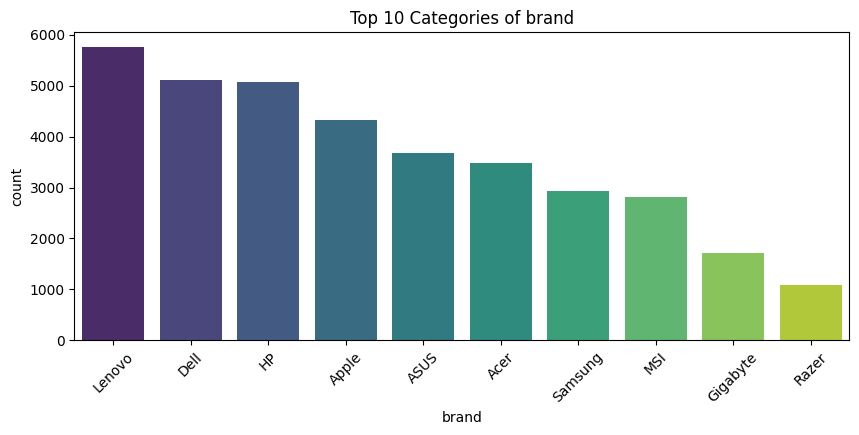

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


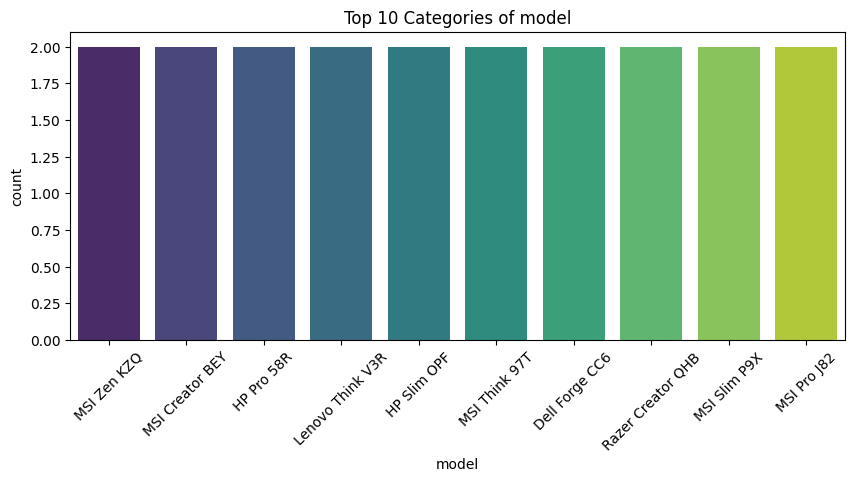

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


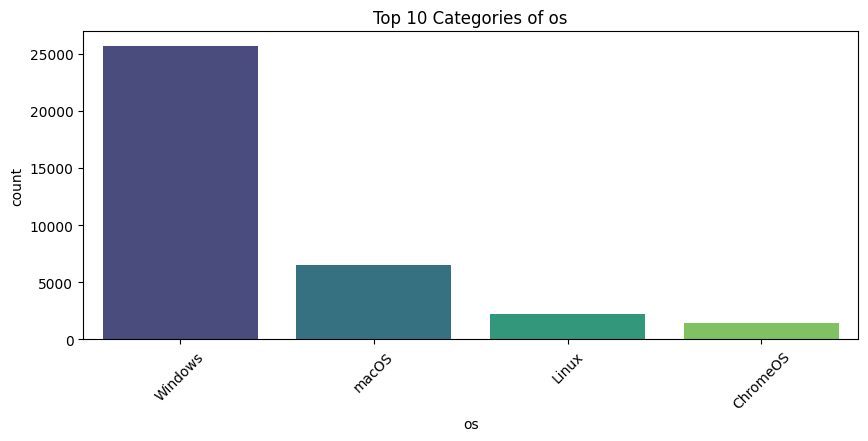

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


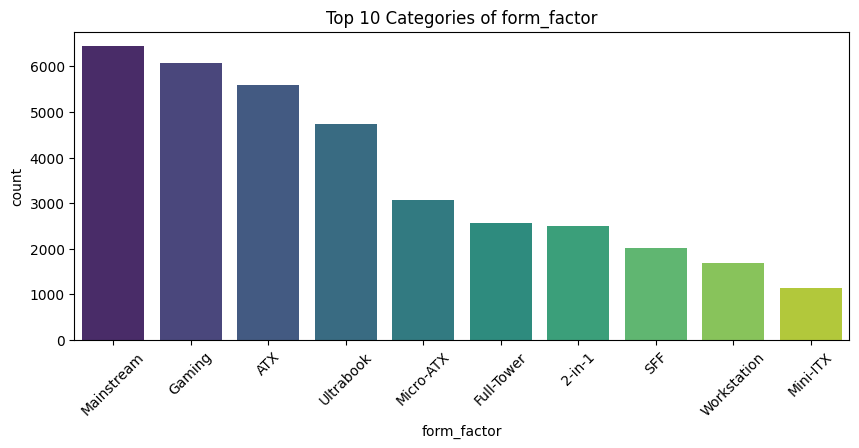

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


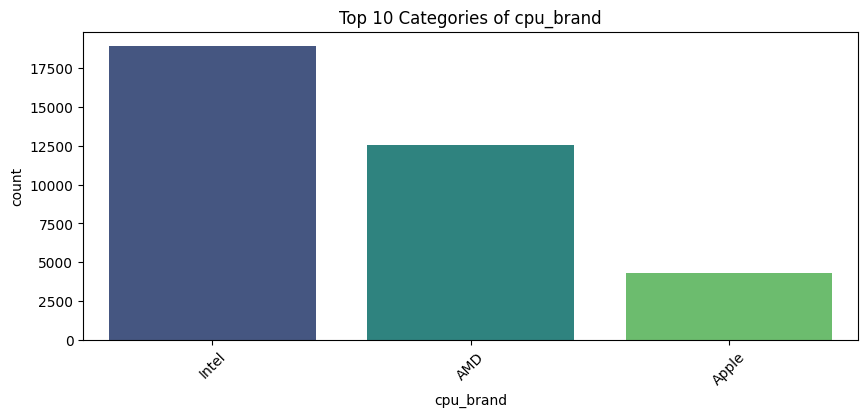

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


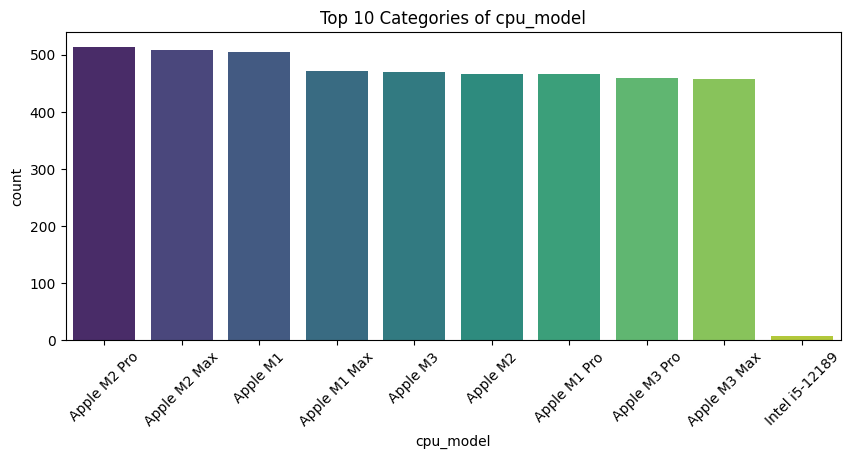

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


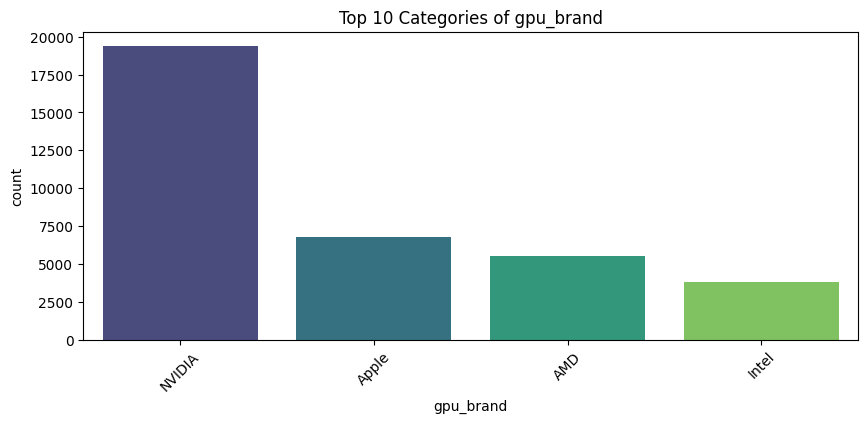

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


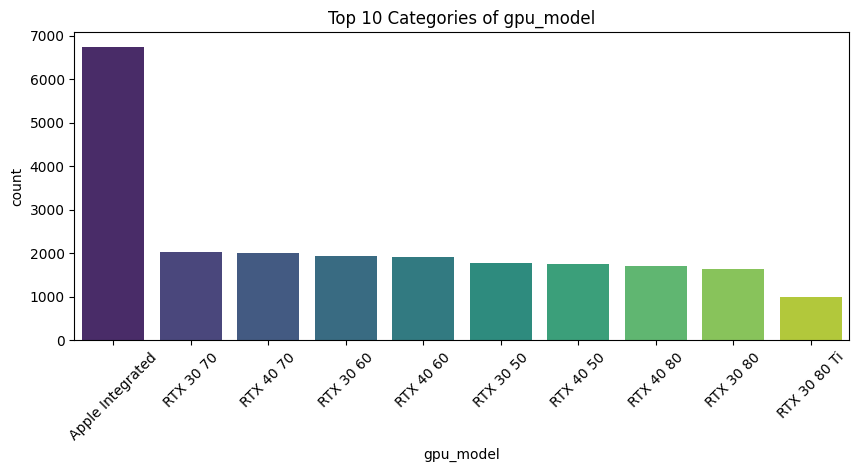

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


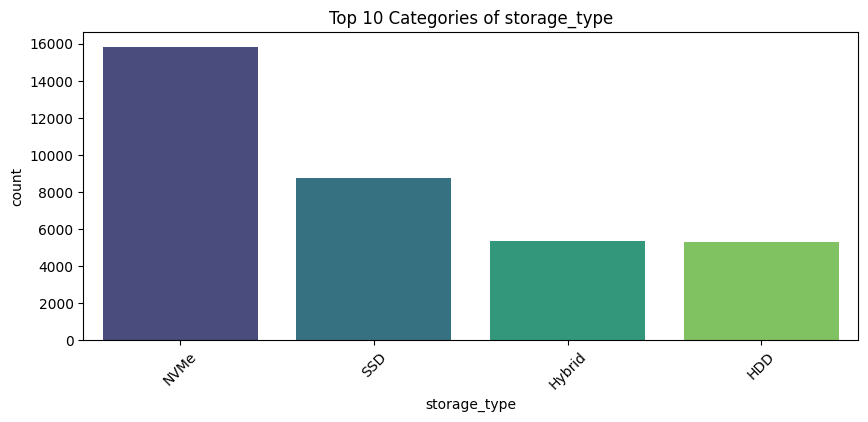

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


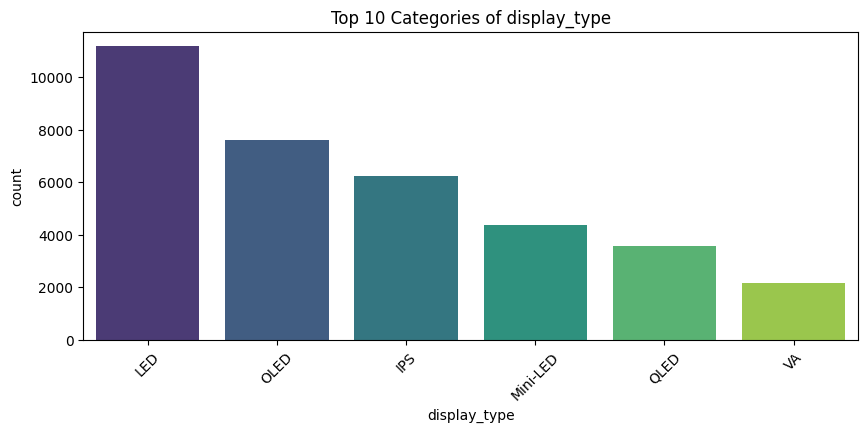

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


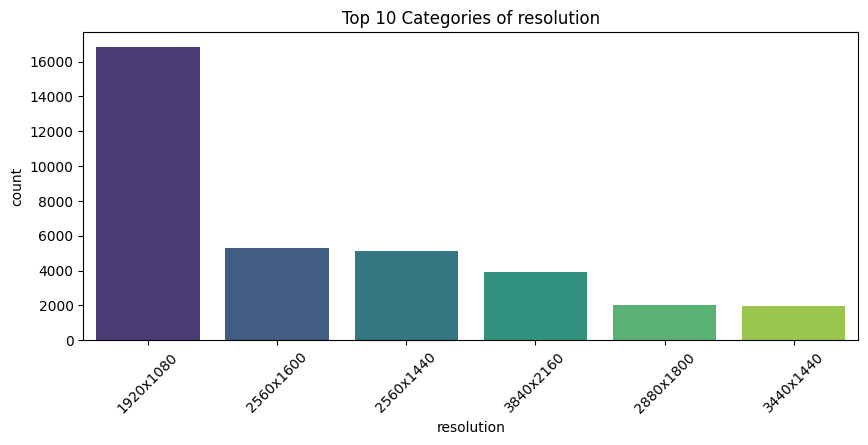

C:\Users\radit\AppData\Local\Temp\ipykernel_956\4176347589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")


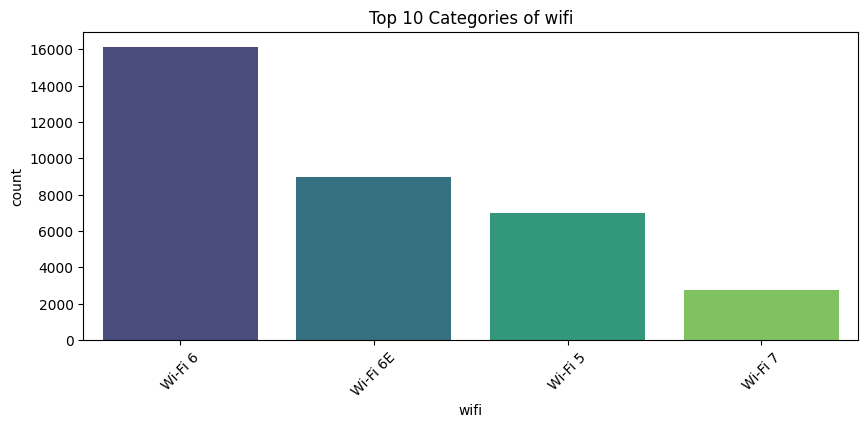

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil kolom kategorikal
cat_cols = df_train.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index[:10], palette="viridis")
    plt.title(f"Top 10 Categories of {col}")
    plt.xticks(rotation=45)
    plt.show()


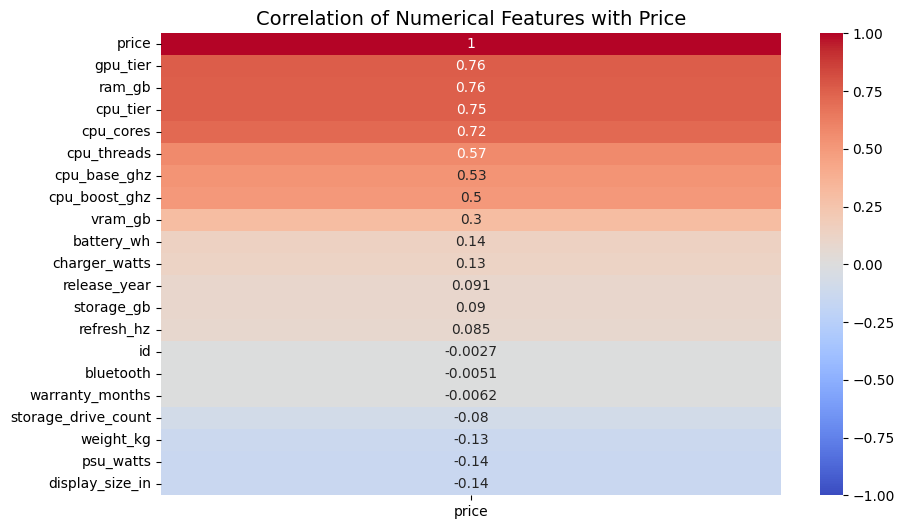

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi
corr = df_train[num_cols].corr()

# Plot heatmap hanya korelasi ke target 'price'
plt.figure(figsize=(10,6))
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Numerical Features with Price", fontsize=14)
plt.show()


# Preprocessing
Lengkapi bagian ini sesuai dengan **Preprocessing Data** yang kalian lakukan

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def split_features_target(df, target="price"):
    if target in df.columns:
        X = df.drop(columns=[target])
        y = df[target]
    else:
        X = df.copy()
        y = None
    return X, y

def feature_engineering(df):
    df = df.copy()
    if "release_year" in df.columns:
        df["device_age"] = 2025 - df["release_year"].fillna(2025)
    if "battery_wh" in df.columns:
        df["has_battery"] = (df["battery_wh"].fillna(0) > 0).astype(int)
    if "charger_watts" in df.columns:
        df["has_charger"] = (df["charger_watts"].fillna(0) > 0).astype(int)
    return df

def build_preprocessor(X, num_strategy="median", scaler="standard", cat_strategy="most_frequent"):
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = X.select_dtypes(include=['object']).columns

    num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy=num_strategy)),
        ("scaler", StandardScaler() if scaler=="standard" else MinMaxScaler())
    ])

    cat_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy=cat_strategy)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])

    return preprocessor

def preprocess_data(df_train, df_test=None, target="price", drop_list=None):
    df_train = feature_engineering(df_train)
    if df_test is not None:
        df_test = feature_engineering(df_test)

    # Drop fitur
    if drop_list:
        df_train = df_train.drop(columns=[c for c in drop_list if c in df_train.columns])
        if df_test is not None:
            df_test = df_test.drop(columns=[c for c in drop_list if c in df_test.columns])

    # Split target
    X, y = split_features_target(df_train, target)
    preprocessor = build_preprocessor(X)

    if df_test is not None:
        X_test, _ = split_features_target(df_test, target)
        return X, y, X_test, preprocessor
    else:
        return X, y, None, preprocessor


In [49]:
# 1. Preprocess
X, y, X_test, preprocessor = preprocess_data(df_train, df_test, drop_list=["id","model"])

# 2. Split Train/Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Transform
X_train = preprocessor.fit_transform(X_train, y_train)
X_val = preprocessor.transform(X_val)
X_test  = preprocessor.transform(X_test) 

# Modeling
**[DILARANG MENGUBAH CODE]**, sesuaikan semua varible yang dibutuhkan.

In [50]:
# Pastikan sudah memiliki variable
## X_train, X_val, y_train, y_val -> df_train

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Validasi
y_pred = regressor.predict(X_val)
print(f"MSE: {mean_squared_error(y_val, y_pred)}")
print(f"MAE: {mean_absolute_error(y_val, y_pred)}")
print(f"R2: {r2_score(y_val, y_pred)}")

MSE: 110049.60025453827
MAE: 233.81190338728075
R2: 0.6737131600541686


# Submission
**[DILARANG MENGUBAH CODE]**

In [51]:
# Pastikan memiliki variable "X_test -> df_test"
id = df_test['id'].tolist()

y_test = regressor.predict(X_test)
submission_df = pd.DataFrame({'id': id, 'price': y_test})
submission_df.to_csv('submission.csv', index=False)